# Setting up our Notebook

In [1]:
# Things to import

# Standard data, plotting, and mathematical tools
import numpy as np
import pandas as pd
import math as math
import matplotlib as mpl
import matplotlib.pyplot as plt

# PCA
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# XGBoost
import xgboost as xgb

# Training and Evaluation Tools
from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV

# Confusion Matrix
import seaborn as sns

# Importing the data

In [4]:
# Importing the data

dfs=['Non-Scaled TA Features 1H for BTC.csv']

# XGBoost for BTC

## Training and testing data

In [5]:
# Defining a function to create PCA matrices

def PCA_creation_train_val_test(no_components, X_train, X_val, X_test):
    
    # Scaling the data with our X_train matrix
    scaler=StandardScaler()
    X_train=scaler.fit_transform(X_train)
    
    # Fitting the PCA to our X_train matrix
    pca=PCA(n_components=no_components)
    X_train=pca.fit_transform(X_train)

    # Scaling the X_val and X_test 
    X_val=scaler.transform(X_val)
    X_test=scaler.transform(X_test)

    # Transforming the X_val and X_test
    X_val=pca.transform(X_val)
    X_test=pca.transform(X_test)
    
    return X_train, X_val, X_test

In [6]:
# Train and test splitting and scaling
X=pd.read_csv(dfs[0])
X=X.dropna()
y=X['Label']
X=X.drop('Label', axis=1)
X=X.drop('Unnamed: 0', axis=1)
X=X.drop('Percent Change', axis=1)

num_classes=2 

# split into train and test
X_train, X_val, y_train, y_val = train_test_split(X, y,test_size=0.1, random_state=100, shuffle=True)
X_train, X_test, y_train, y_test=train_test_split(X_train, y_train, test_size=0.1, random_state=100, shuffle=True)


X_train, X_val, X_test=PCA_creation_train_test_val(20, X_train, X_val, X_test)


y_train = utils.to_categorical(y_train, num_classes)
y_test = utils.to_categorical(y_test, num_classes)
y_val = utils.to_categorical(y_val, num_classes)

NameError: name 'PCA_creation_train_test_val' is not defined

## Grid Search XGB

In [14]:
# Setting up our grid

param_grid = {
    "max_depth": [3, 4, 5, 7],
    "learning_rate": [0.1, 0.01, 0.05],
    "gamma": [0, 0.25, 1],
    "reg_lambda": [0, 1, 10],
    "scale_pos_weight": [1, 3, 5],
    "subsample": [0.8],
    "colsample_bytree": [0.5],
}

# Fitting our XGBoost with out grid

# Init classifier
xgb_cl = xgb.XGBClassifier()

# Init Grid Search
grid_cv = GridSearchCV(xgb_cl, param_grid, n_jobs=-1, cv=5)

# Fit
grid_cv.fit(X_train, y_train)

# Getting the score and best parameters from our grid search

print('Score ',grid_cv.best_score_)
print('Params ', grid_cv.best_params_)

C:\Users\chris\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[01:35:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "scale_pos_weight" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[01:35:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Score  0.8052356020942408
Params  {'colsample_bytree': 0.5, 'gamma': 1, 'learning_rate': 0.1, 'max_depth': 7, 'reg_lambda': 1, 'scale_pos_weight': 1, 'subsample': 0.8}


In [15]:
# Training our XGBoost with our best params

# Setting up our XGBoost with our best params
best_xgb = xgb.XGBClassifier(
    grid_cv.best_params_,
    colsample_bytree=0.5,
    subsample=0.8)

# Fitting the model
best_xgb.fit(X_train, y_train)

[01:35:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\chris\anaconda3\lib\site-packages\xgboost\core.py:430: FutureWarning: Pass `objective` as keyword args.  Passing these as positional arguments will be considered as error in future releases.
  warnings.warn(


[1. 1. 0. ... 0. 2. 0.]
0.8087946603847664


array([[1890,  354,   48],
       [ 269, 2026,  351],
       [  47,  392, 2264]], dtype=int64)

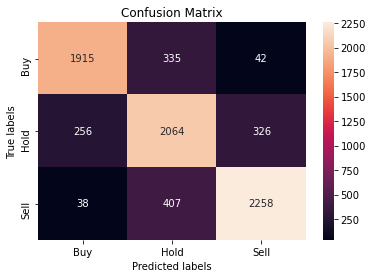

In [20]:
# Confusion Matrix

# Performance
y_pred=xgb_model_BTC.predict(X_test) 
# y_pred=np.argmax(y_pred, axis=1)
# y_test=np.argmax(y_test, axis=1)

# Plotting Confusion Matrix
cm=confusion_matrix(y_test, y_pred)
ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['Buy', 'Hold', 'Sell']); ax.yaxis.set_ticklabels(['Buy', 'Hold', 'Sell']);

## Saving and Reloading the Model

In [16]:
# save to JSON
best_xgb.save_model("Models/XGB 1H BTC.json")

In [19]:
# Loading the model
xgb_model_BTC = xgb.XGBClassifier()
xgb_model_BTC.load_model("Models/XGB 1H BTC.json")